In [1]:
@file:Repository("http://maven.huygens.knaw.nl/repository/")
@file:DependsOn("nl.knaw.huygens.tag:tag-jupyter:0.1.4")

import nl.knaw.huygens.tag.jupyter.*
import nl.knaw.huygens.tag.mct.*

TAG.init()
fun TAGMCT.show() = MIME(this.asSVGPair())

Welcome to TAG
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



In [2]:
import java.nio.file.Paths
val tokens = TAG.tokenize(Paths.get("test.tagml"))
tokens.joinToString("\n")

Warnings:
  @6:1..6:8: Element "tagml" is not defined in the ontology.
  @6:8..6:14: Element "book" is not defined in the ontology.
  @6:14..6:21: Element "title" is not defined in the ontology.
  @6:35..6:44: Element "chapter" is not defined in the ontology.
  @6:44..6:47: Element "l" is not defined in the ontology.


Range{1:1 - 5:4} [!{":ontology":{"root":"tagml"}}!]
Range{6:1 - 6:8} [tagml>
Range{6:8 - 6:14} [book>
Range{6:14 - 6:21} [title>
Range{6:21 - 6:28} Foo Bar
Range{6:28 - 6:35} <title]
Range{6:35 - 6:44} [chapter>
Range{6:44 - 6:47} [l>
Range{6:47 - 6:72} Lorem ipsum dolar amacet.
Range{6:72 - 6:75} <l]
Range{6:75 - 6:84} <chapter]
Range{6:84 - 6:90} <book]
Range{6:90 - 6:97} <tagml]

In [3]:
import nl.knaw.huygens.tag.mct.*
val mct = tokens.asMCT()
mct.nodes.forEach{println(it)}

Markup(tagml)
Markup(book)
Markup(title)
Text(Foo Bar)
Markup(chapter)
Markup(l)
Text(Lorem ipsum dolar amacet.)


In [4]:
mct.asDot()

digraph TextGraph{
  node [font="helvetica";style="filled";fillcolor="white"]
  subgraph{
    t3 [shape=box;arrowhead=none;label=<Foo Bar>]
    t6 [shape=box;arrowhead=none;label=<Lorem ipsum dolar amacet.>]
    rank=same
    t3->t6 [color=invis;arrowhead=none;label=""]
  }
  m0 [color=red;label=<tagml>]
  m1 [color=red;label=<book>]
  m2 [color=red;label=<title>]
  m4 [color=red;label=<chapter>]
  m5 [color=red;label=<l>]
  m0->m1[color=red;arrowhead=none]
  m1->m2[color=red;arrowhead=none]
  m1->m4[color=red;arrowhead=none]
  m2->t3[color=red;arrowhead=none]
  m4->m5[color=red;arrowhead=none]
  m5->t6[color=red;arrowhead=none]
}

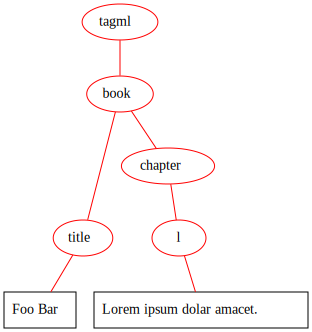

In [5]:
mct.show()

### Parsing errors:

In [6]:
import java.io.File
val tokens = TAG.tokenize(File("bad.tagml"))
tokens

Warnings:
  @6:1..6:10: Element "tzzagml" is not defined in the ontology.
  @6:10..6:16: Element "book" is not defined in the ontology.
  @6:16..6:23: Element "title" is not defined in the ontology.
  @6:37..6:46: Element "chapter" is not defined in the ontology.
  @6:46..6:49: Element "l" is not defined in the ontology.


nl.knaw.huygens.tag.jupyter.TAG$TAGMLParseError: 
Errors:
  @6:1..6:10: Root element "tzzagml" does not match the one defined in the header: "tagml"
  @6:92..6:99: Closing tag "<tagml]" found without corresponding open tag.


## Overlap:

[!{
  ":ontology": {
    "root": "tagml"
  }
}!]
[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]

Warnings:
  @6:1..6:14: Element "tagml" is not defined in the ontology.
  @6:14..6:19: Element "x" is not defined in the ontology.
  @6:25..6:30: Element "y" is not defined in the ontology.


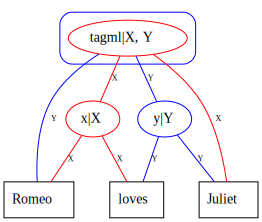

In [7]:
val tagml = ("""
    |[!{
    |  ":ontology": {
    |    "root": "tagml"
    |  }
    |}!]
    |[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]
    |""".trimMargin())
println(tagml)
val tokens = TAG.tokenize(tagml)
val mct = tokens.asMCT()
mct.show()

## Generate basic header from TAGML body:

In [8]:
val body = "[body id=1 title='test'>[m:q speaker->brown0001>The way I see it,<-m:q] he said, [+m:q>if you’re going to build a time machine into a car, why not do it with some style?<m:q][x:note text=\"about the DeLorean\"]<body]"

val header = TAG.inferHeader(body)

println(header)

[!{
  ":entities": {
    "brown0001": {}
  },
  ":namespaces": {
    "m": "https://example.org/ns/m",
    "x": "https://example.org/ns/x"
  },
  ":ontology": {
    "root": "body",
    "elements": {
      "body": {
        "description": "...",
        "attributes": [
          "id",
          "title"
        ]
      },
      "m:q": {
        "description": "...",
        "attributes": [
          "speaker"
        ],
        "properties": [
          "discontinuous"
        ]
      },
      "x:note": {
        "description": "...",
        "properties": [
          "milestone"
        ],
        "attributes": [
          "text"
        ]
      }
    },
    "attributes": {
      "id": {
        "description": "...",
        "dataType": "Integer"
      },
      "title": {
        "description": "...",
        "dataType": "String"
      },
      "speaker": {
        "description": "...",
        "dataType": "Pointer"
      },
      "text": {
        "description": "...",
        "dataType

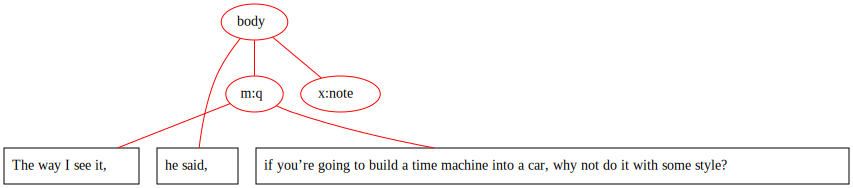

In [9]:
val tagml = header + body
val tokens = TAG.tokenize(tagml)
val mct = tokens.asMCT()
mct.show()